In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import *
import numpy as np
import seaborn as sns
df = pd.read_csv('bigmart.csv')

df.describe(include="all")

C:\Users\family\PycharmProjects\ML\venv\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


C:\Users\family\PycharmProjects\ML\venv\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [19]:
df.Outlet_Size.fillna('Missing',inplace=True)

In [26]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


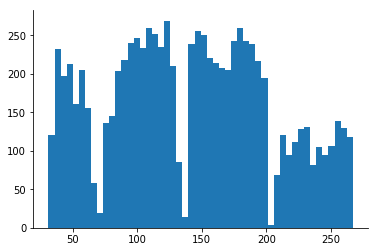

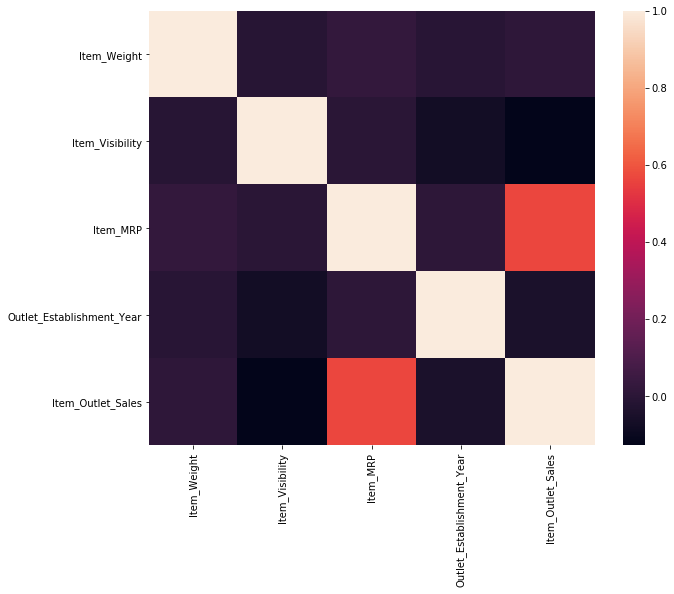

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

C:\Users\family\PycharmProjects\ML\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


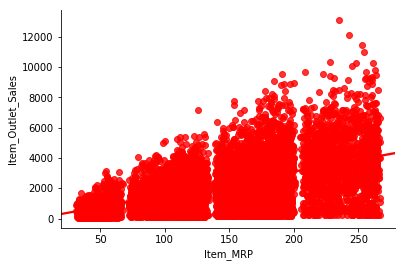

In [32]:
sns.regplot(x = 'Item_MRP', y='Item_Outlet_Sales',data = df, color = 'red')
sns.despine()
#color is red in relation with heatmaps for attribute Item_MRP

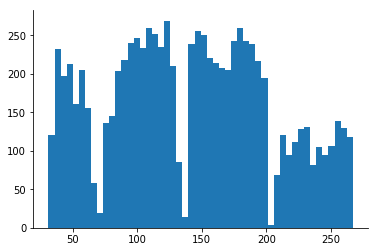

In [33]:
plt.hist(x  = 'Item_MRP',data=df, bins=50)
sns.despine()

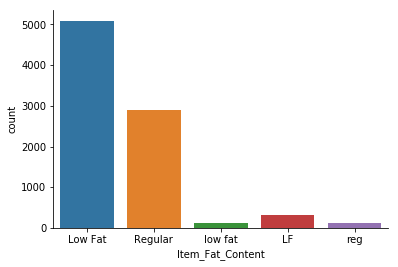

In [34]:
sns.countplot(x  = 'Item_Fat_Content',data=df)
sns.despine()

C:\Users\family\PycharmProjects\ML\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


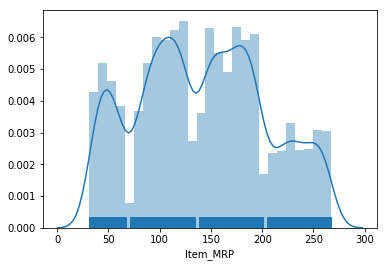

In [36]:
sns.distplot(df['Item_MRP'], rug = True);

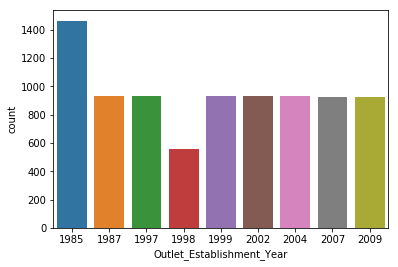

In [37]:
sns.countplot(x = 'Outlet_Establishment_Year', data = df)

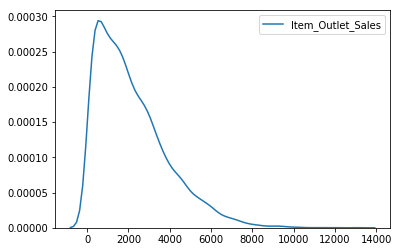

In [39]:
sns.kdeplot(df['Item_Outlet_Sales'])

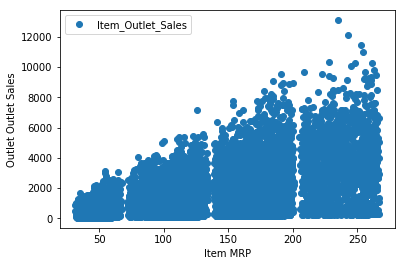

In [44]:
df.plot(x='Item_MRP', y= 'Item_Outlet_Sales', style ='o')
plt.xlabel('Item MRP')
plt.ylabel('Outlet Outlet Sales')
plt.show()

C:\Users\family\PycharmProjects\ML\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


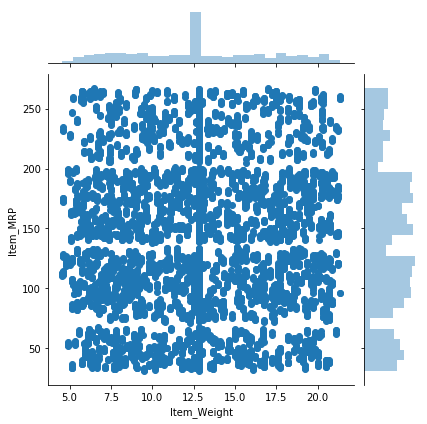

In [45]:
sns.jointplot(x='Item_Weight',y='Item_MRP',data=df)

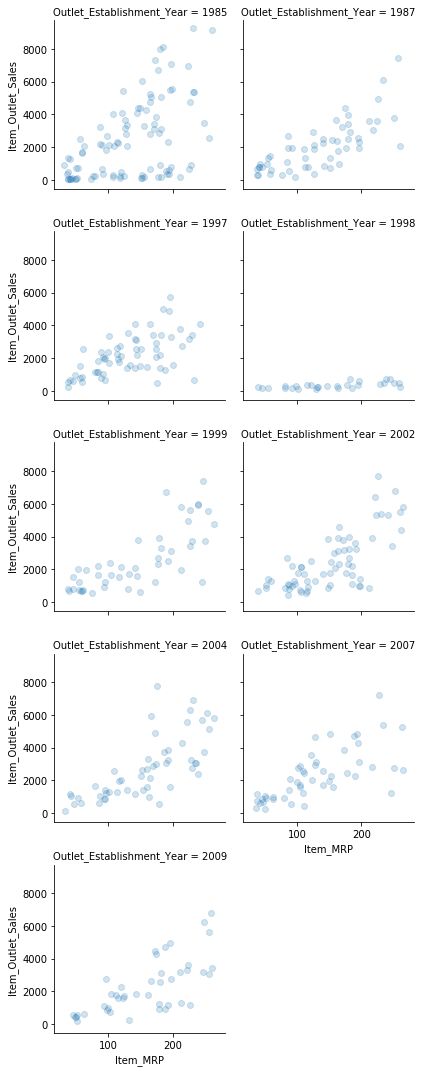

In [14]:
d=df.head(50)


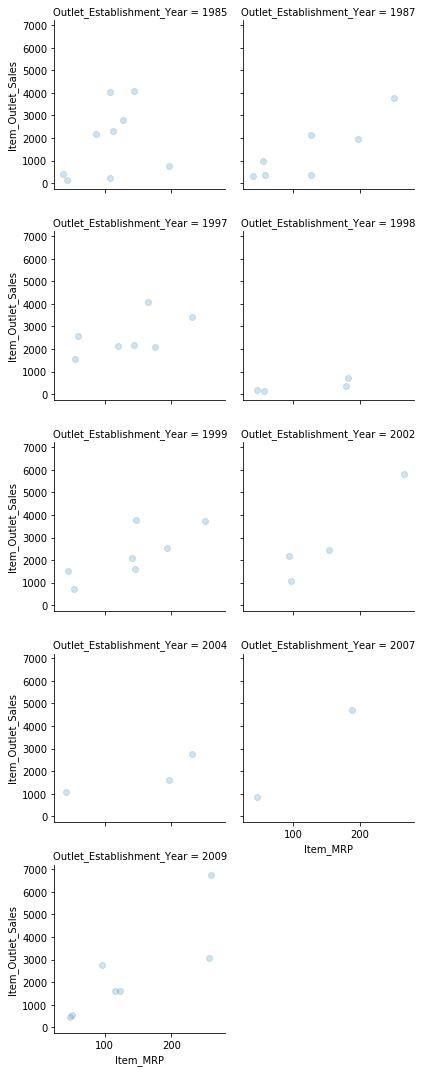

In [6]:
grid = sns.FacetGrid(d, col='Outlet_Establishment_Year',col_wrap=2)
grid.map(plt.scatter,'Item_MRP','Item_Outlet_Sales',alpha = 0.2)
sns.despine()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,443.4228,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,1998,732.3800,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,...,1,0,1,0,0,0,1,0,0,0
5,FDP36,10.395,0.000000,51.4008,OUT018,2009,556.6088,1,0,0,...,1,0,0,1,0,0,0,1,0,0
6,FDO10,13.650,0.012741,57.6588,OUT013,1987,343.5528,0,0,0,...,1,0,1,0,0,0,0,1,0,0
7,FDP10,NaN,0.127470,107.7622,OUT027,1985,4022.7636,0,0,0,...,1,0,0,0,1,0,1,0,0,0
8,FDH17,16.200,0.016687,96.9726,OUT045,2002,1076.5986,0,0,0,...,0,0,1,0,0,0,0,1,0,0
9,FDU28,19.200,0.094450,187.8214,OUT017,2007,4710.5350,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [17]:
y = df['Item_Outlet_Sales']
x = df.drop(['Item_Outlet_Sales', 'Item_Identifier','Outlet_Identifier'],axis=1)

In [18]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state =85)

In [26]:
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').